# Monty Hall Problem Simulation

The Monty Hall Problem is a probability puzzle based on the gameshow Let's Make A Deal.

1. There are three doors, 1 with a car (the prize), 2 with goats (the consolation).
2. You are told to pick a door.
3. Monty, the host, reveals a goat behind one of the other doors. Leaving only your door and one other left.
4. He offers you the chance to stick or twist, either keeping your original door, or swapping to the other that has not yet been revealed.
5. You win the prize behind the door you have selected.
6. What do you do? Stick or switch?

It's a problem loaded with both emotional and mathematical obstacles, often leading the player to make the wrong decision, whether they use logical reasoning or go with their gut instinct. The correct decision would be to switch to the other door that has yet to be revealed. While this is not particularly intuitive, the decision is not 50/50. 

The host has to reveal a door containing a goat, otherwise the game is ruined. You correctly pick the car only 1/3 of the time, therefore 2/3s of the time, Monty reveals, by omission, the door belonging to the car. If you choose to switch to the unrevealed door, you will win 2/3s of the time. This does not work for more modern gameshows such as Deal Or No Deal, as the improved probability is based on the information gain explained above. If the host did not know where the car was, or he could open the door belonging to the car, the odds would not be improved.

In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Always take the switch

### Expectation:

The host has to reveal a goat. They cannot show you the 'car' door as the game would be over. In every situation in which you have not picked the door with a car behind it, the host must pick the door with the goat. As 2/3s of the time, you'll pick a door with one of the goats, the host reveals to you whihc door the car is behind. Therefore, if you always take the switch, you will be right 2/3s of the time and only wrong the 1/3 of the times you correctly pick the car. 

### Situation 2/3s of the time:

1. You pick a goat.
2. One of the other doors has the car, the other has another goat.
3. The host cannot pick the car, as the gameshow will be over.
4. Therefore, 2/3s of the time, the car is revealed to you as the door the host did not pick.

### Simulation:

In [2]:
result = []
for i in range(0,10000):
    # 1/3 chance of winning the car
    prizes = ['Goat', 'Goat', 'Car']
    # Randomly selected door
    your_choice = random.choice(prizes)
    prizes.remove(your_choice)
    # Host can only reveal the goat, not the car
    host_choice = random.choice(prizes)
    if host_choice == 'Car':
        host_choice = 'Goat'
    prizes.remove(host_choice)
    
    #print('Host reveals {} behind one of the prize doors. He gives you the option to switch to the unopened door, or keep your original choice. Do you want to switch?'.format(host_choice))
    switch = prizes[0]
    
    # you switch
    your_choice = switch
    result.append(your_choice)

In [3]:
cars_switch = result.count('Car')
goats_switch = result.count('Goat')
cars_switch, goats_switch

(6680, 3320)

### Always keep your original choice

### Expectation:

You have a 1/3 chance of correctly picking the car. We would expect you to win a car 1/3 of the time.

### Simulation

In [4]:
result = []
for i in range(0,10000):
    # 1/3 chance of winning the car
    prizes = ['Goat', 'Goat', 'Car']
    # Randomly selected door
    your_choice = random.choice(prizes)
    prizes.remove(your_choice)
    # Host can only reveal the goat, not the car
    host_choice = random.choice(prizes)
    if host_choice == 'Car':
        host_choice = 'Goat'
    prizes.remove(host_choice)
    
    #print('Host reveals {} behind one of the prize doors. He gives you the option to switch to the unopened door, or keep your original choice. Do you want to switch?'.format(host_choice))
    switch = prizes[0]
    
    # you switch
    your_choice = your_choice
    result.append(your_choice)

In [5]:
cars_keep = result.count('Car')
goats_keep = result.count('Goat')
cars_keep, goats_keep

(3358, 6642)

## Random, arbitrary choice

Arbitrarily choosing to switch should give you a chance of winning the car directly between 1/3 and 2/3, which means you would win the car 1/2 (3/6, simplified) of the time.

### Simulation:

In [6]:
result = []
for i in range(0,10000):
    # 1/3 chance of winning the car
    prizes = ['Goat', 'Goat', 'Car']
    # Randomly selected door
    your_choice = random.choice(prizes)
    prizes.remove(your_choice)
    # Host can only reveal the goat, not the car
    host_choice = random.choice(prizes)
    if host_choice == 'Car':
        host_choice = 'Goat'
    prizes.remove(host_choice)
    
    #print('Host reveals {} behind one of the prize doors. He gives you the option to switch to the unopened door, or keep your original choice. Do you want to switch?'.format(host_choice))
    switch = prizes[0]
    
    # you switch
    choices = [your_choice, switch]
    your_choice = random.choice(choices)
    result.append(your_choice)

In [7]:
cars_rand = result.count('Car')
goats_rand = result.count('Goat')

cars_rand, goats_rand

(5020, 4980)

## Visualised

In [8]:
goats = [goats_switch, goats_keep, goats_rand]
cars = [cars_switch, cars_keep, cars_rand]
choice = ['Switch', 'Keep', 'Random']

df = pd.DataFrame(data=zip(choice, goats, cars), columns=['Choice', 'Goats', 'Cars'])
df.head()

,Choice,Goats,Cars
0,Switch,3320,6680
1,Keep,6642,3358
2,Random,4980,5020


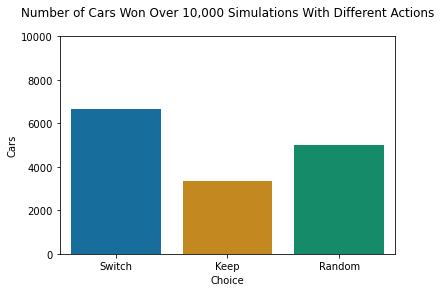

In [9]:
sns.barplot(x='Choice', y='Cars', data=df, palette='colorblind')
plt.title('Number of Cars Won Over 10,000 Simulations With Different Actions', pad=20);
plt.ylim(0, 10000);

Most people's instinct is to keep their original choice, from a combination of thinking the probabilities are equally distributed across all three doors and a preference for their chosen door (through loss or 'switch' aversion). While this incorrect decision can be the cause of cognitive biases, it is also susceptible to incorrect reasoning through a misunderstanding of the probability distribution (Tabau, Aguilar-Lleyda, and Johnson, 2015).


As can be seen in the above graph, even arbitrarily choosing whether you keep or switch provides a better outcome to just keeping your original door. Regardless of this, many people will still choose to keep their door even if they are told they have better odds if they switch. This can be explained by psychology, with research suggesting that the pain of losing a possession is twice as powerful as the pleasure of acquiring it (Tversky and Kahneman, 2000). Whether the correct decision is known or not, there remains a temptaton to base decisions off emotions. 

Simulating each decision 10,000 times may prove to be more persuading than simply explaining the probability, as most people tend to be more susceptible to practical experience over theory. 

## References

Tabau, E., Aguilar-Lleyda, D., Johnson, E. D. (2015). Reasoning and choice in the Monty Hall Dilemma (MHD): implications for improving Bayesian reasoning. Front Psychol 6:353. doi: 10.3389/fpsyg.2015.00353

Tversky, A., & Kahneman, D. (2000). Loss Aversion in Riskless Choice: A Reference-Dependent Model. In D. Kahneman & A. Tversky (Eds.), Choices, Values, and Frames (pp. 143-158). Cambridge: Cambridge University Press. doi:10.1017/CBO9780511803475.008